<a href="https://cognitiveclass.ai"><img src = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width = 400> </a>

<h1 align=center><font size = 5>Peer Review Final Assignment</font></h1>

## Introduction


In this lab, you will build an image classifier using the VGG16 pre-trained model, and you will evaluate it and compare its performance to the model we built in the last module using the ResNet50 pre-trained model. Good luck!

In [1]:
#PART 0 - Please Ignore

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.applications import ResNet50
from keras.applications.resnet50 import preprocess_input
import matplotlib.pyplot as plt


In [3]:
#!wget https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/concrete_data_week3.zip --no-check-certificate

In [4]:
#!unzip concrete_data_week3.zip

In [5]:
num_classes = 2
image_size = (224,224)
batch_size_training = 100
batch_size_validation = 100

In [6]:
data_generator = ImageDataGenerator(
    preprocessing_function=preprocess_input,
)

In [7]:
train_generator = data_generator.flow_from_directory(
    'concrete_data_week3/train',
    target_size= image_size,
    batch_size=batch_size_training,
    class_mode='categorical')


validation_generator = data_generator.flow_from_directory(
    'concrete_data_week3/valid',
    target_size=image_size,
    batch_size=batch_size_validation,
    class_mode='categorical')

Found 30001 images belonging to 2 classes.
Found 10001 images belonging to 2 classes.


In [8]:
model_resnet = Sequential()

model_resnet.add(ResNet50(
    include_top=False,
    pooling='avg',
    weights='imagenet',
    ))

model_resnet.add(Dense(num_classes, activation='softmax'))

for layer in model_resnet.layers:
    print(layer)


2024-04-11 00:25:40.797323: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2024-04-11 00:25:40.797351: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 18.00 GB
2024-04-11 00:25:40.797359: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 6.00 GB
2024-04-11 00:25:40.797373: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-04-11 00:25:40.797382: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


<Functional name=resnet50, built=True>
<Dense name=dense, built=False>


In [9]:
model_resnet.layers[0].trainable = False
model_resnet.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ ?                      │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [10]:
model_resnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
steps_per_epoch_training = train_generator.samples // batch_size_training
steps_per_epoch_validation = validation_generator.samples // batch_size_validation
num_epochs = 3

In [12]:
fit_history = model_resnet.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch_training,
    epochs=num_epochs,
    validation_data=validation_generator,
    validation_steps=steps_per_epoch_validation,
    verbose=1,
)

Epoch 1/3


2024-04-11 00:25:42.613614: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
/opt/anaconda3/envs/tf_m3/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


300/300 ━━━━━━━━━━━━━━━━━━━━ 204s 673ms/step - accuracy: 0.9393 - loss: 0.1180 - val_accuracy: 0.9983 - val_loss: 0.0076
Epoch 2/3
  1/300 ━━━━━━━━━━━━━━━━━━━━ 2:29 501ms/step - accuracy: 1.0000 - loss: 0.0047

2024-04-11 00:29:06.884526: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-11 00:29:06.884547: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/ArgMax/_10]]
2024-04-11 00:29:06.884558: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1810112115330093415
2024-04-11 00:29:06.884562: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12333468468128873310
2024-04-11 00:29:06.884569: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17104463818623835722
2024-04-11 00:29:06.884571: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9594435590153

300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 0.0023 - val_accuracy: 1.0000 - val_loss: 0.0045
Epoch 3/3


2024-04-11 00:29:07.449883: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-11 00:29:07.449904: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 4321861020189241200
2024-04-11 00:29:07.449910: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[ArgMax_1/_10]]


300/300 ━━━━━━━━━━━━━━━━━━━━ 200s 666ms/step - accuracy: 0.9980 - loss: 0.0077 - val_accuracy: 0.9989 - val_loss: 0.0050


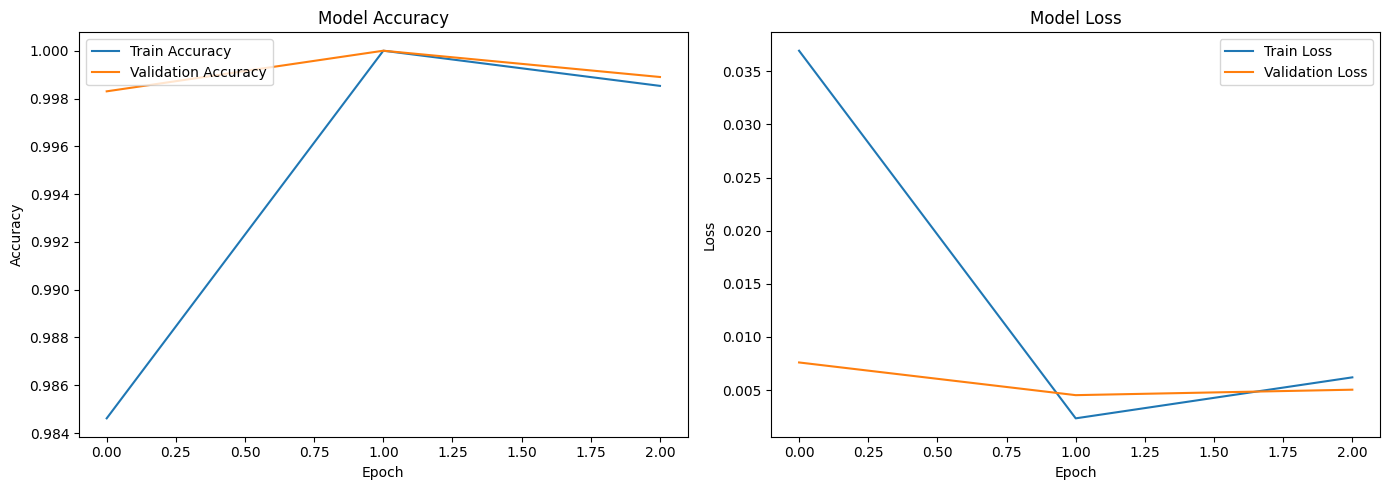

In [13]:
history = fit_history.history

# Creating subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Plot training & validation accuracy values
ax[0].plot(history['accuracy'], label='Train Accuracy')
ax[0].plot(history['val_accuracy'], label='Validation Accuracy')
ax[0].set_title('Model Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(loc="upper left")

# Plot training & validation loss values
ax[1].plot(history['loss'], label='Train Loss')
ax[1].plot(history['val_loss'], label='Validation Loss')
ax[1].set_title('Model Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(loc="upper right")

plt.tight_layout()
plt.show()

In [14]:
model_resnet.summary()
model_resnet.save('classifier_resnet_model.keras')

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 2048)           │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │         4,098 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,600,008 (90.03 MB)

 Trainable params: 4,098 (16.01 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

 Optimizer params: 8,198 (32.03 KB)

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>    

1. <a href="#item41">Download Data 
2. <a href="#item42">Part 1</a>
3. <a href="#item43">Part 2</a>  
4. <a href="#item44">Part 3</a>  

</font>
    
</div>

<a id="item41"></a>

## Download Data

Use the <code>wget</code> command to download the data for this assignment from here: https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/concrete_data_week4.zip

Use the following cells to download the data.

In [15]:
#!wget  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/concrete_data_week4.zip --no-check-certificate

In [16]:
#!unzip 'concrete_data_week4.zip' 

After you unzip the data, you fill find the data has already been divided into a train, validation, and test sets.

<a id="item42"></a>

## Part 1

In this part, you will design a classifier using the VGG16 pre-trained model. Just like the ResNet50 model, you can import the model <code>VGG16</code> from <code>keras.applications</code>.

You will essentially build your classifier as follows:
1. Import libraries, modules, and packages you will need. Make sure to import the *preprocess_input* function from <code>keras.applications.vgg16</code>.
2. Use a batch size of 100 images for both training and validation.
3. Construct an ImageDataGenerator for the training set and another one for the validation set. VGG16 was originally trained on 224 × 224 images, so make sure to address that when defining the ImageDataGenerator instances.
4. Create a sequential model using Keras. Add VGG16 model to it and dense layer.
5. Compile the mode using the adam optimizer and the categorical_crossentropy loss function.
6. Fit the model on the augmented data using the ImageDataGenerators.

Use the following cells to create your classifier.

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

In [18]:
num_classes = 2
batch_size = 100
image_size = (224, 224)

In [19]:

generator = ImageDataGenerator(preprocessing_function=preprocess_input)

training_generator = generator.flow_from_directory(
    "concrete_data_week4/train",
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical",
)
validation_generator = generator.flow_from_directory(
    "concrete_data_week4/valid",
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical",
)

Found 30001 images belonging to 2 classes.


Found 9501 images belonging to 2 classes.


In [20]:
model_vgg16 = Sequential()

model_vgg16.add(VGG16(include_top=False, pooling="avg", weights="imagenet",))
model_vgg16.add(Dense(num_classes, activation="softmax"))

model_vgg16.layers[0].trainable = False

model_vgg16.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ ?                      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [21]:
model_vgg16.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)

In [22]:
num_epochs = 3
steps_per_epoch_training = (train_generator.samples // batch_size_training)
steps_per_epoch_validation = (validation_generator.samples // batch_size_validation)

history_vgg16 = model_vgg16.fit(
    training_generator,
    steps_per_epoch=steps_per_epoch_training,
    epochs=num_epochs,
    validation_data=validation_generator,
    validation_steps=steps_per_epoch_validation,
    verbose=1,
)

Epoch 1/3


300/300 ━━━━━━━━━━━━━━━━━━━━ 286s 946ms/step - accuracy: 0.7869 - loss: 0.6888 - val_accuracy: 0.9921 - val_loss: 0.0412
Epoch 2/3
  1/300 ━━━━━━━━━━━━━━━━━━━━ 3:36 723ms/step - accuracy: 1.0000 - loss: 0.0319

2024-04-11 00:37:16.037800: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-11 00:37:16.037823: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14326583208807006438
2024-04-11 00:37:16.037842: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12156721929684589470
2024-04-11 00:37:16.037846: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/add_2/_16]]
2024-04-11 00:37:16.037858: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10360428107017099277
2024-04-11 00:37:16.037863: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14420851

300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 694us/step - accuracy: 1.0000 - loss: 0.0160 - val_accuracy: 1.0000 - val_loss: 0.0043
Epoch 3/3
300/300 ━━━━━━━━━━━━━━━━━━━━ 286s 953ms/step - accuracy: 0.9938 - loss: 0.0353 - val_accuracy: 0.9954 - val_loss: 0.0227


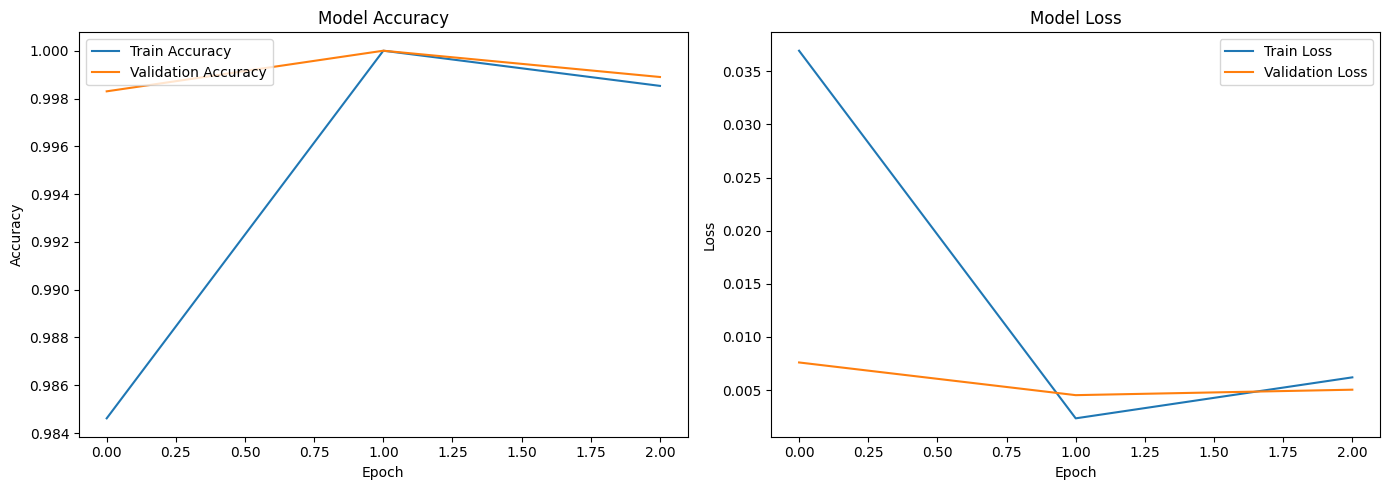

In [23]:
history = fit_history.history

# Creating subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Plot training & validation accuracy values
ax[0].plot(history['accuracy'], label='Train Accuracy')
ax[0].plot(history['val_accuracy'], label='Validation Accuracy')
ax[0].set_title('Model Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(loc="upper left")

# Plot training & validation loss values
ax[1].plot(history['loss'], label='Train Loss')
ax[1].plot(history['val_loss'], label='Validation Loss')
ax[1].set_title('Model Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(loc="upper right")

plt.tight_layout()
plt.show()

In [24]:
model_vgg16.summary()
model_vgg16.save('classifier_vgg16_model.keras')

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 512)            │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,717,768 (56.14 MB)

 Trainable params: 1,026 (4.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 2,054 (8.03 KB)

<a id="item43"></a>

## Part 2

In this part, you will evaluate your deep learning models on a test data. For this part, you will need to do the following:

1. Load your saved model that was built using the ResNet50 model. 
2. Construct an ImageDataGenerator for the test set. For this ImageDataGenerator instance, you only need to pass the directory of the test images, target size, and the **shuffle** parameter and set it to False.
3. Use the **evaluate_generator** method to evaluate your models on the test data, by passing the above ImageDataGenerator as an argument. You can learn more about **evaluate_generator** [here](https://keras.io/models/sequential/).
4. Print the performance of the classifier using the VGG16 pre-trained model.
5. Print the performance of the classifier using the ResNet pre-trained model.


Use the following cells to evaluate your models.

In [25]:
from keras.models import load_model
# model_resnet50 = load_model("classifier_resnet_model.keras")

In [26]:
testing_generator = generator.flow_from_directory(
    "concrete_data_week4/test", target_size=image_size, shuffle=False,
)

Found 500 images belonging to 2 classes.


In [27]:
performance_vgg16 = model_vgg16.evaluate(testing_generator)
print("Performance of the VGG16-trained model")
print("Loss: {}".format(round(performance_vgg16[0], 5)))
print("Accuracy: {}".format(round(performance_vgg16[1], 5)))

 3/16 ━━━━━━━━━━━━━━━━━━━━ 3s 239ms/step - accuracy: 1.0000 - loss: 0.0189

16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 236ms/step - accuracy: 0.9990 - loss: 0.0202
Performance of the VGG16-trained model
Loss: 0.01929
Accuracy: 0.998


In [28]:
performance_resnet50 = model_resnet.evaluate(testing_generator)
print("Performance of the ResNet50-trained model")
print("Loss: {}".format(round(performance_resnet50[0], 5)))
print("Accuracy: {}".format(round(performance_resnet50[1], 5)))

16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 215ms/step - accuracy: 1.0000 - loss: 0.0025
Performance of the ResNet50-trained model
Loss: 0.0024
Accuracy: 1.0


<a id="item44"></a>

## Part 3

In this model, you will predict whether the images in the test data are images of cracked concrete or not. You will do the following:

1. Use the **predict_generator** method to predict the class of the images in the test data, by passing the test data ImageDataGenerator instance defined in the previous part as an argument. You can learn more about the **predict_generator** method [here](https://keras.io/models/sequential/).
2. Report the class predictions of the first five images in the test set. You should print something list this:

<center>
    <ul style="list-style-type:none">
        <li>Positive</li>  
        <li>Negative</li> 
        <li>Positive</li>
        <li>Positive</li>
        <li>Negative</li>
    </ul>
</center>

Use the following cells to make your predictions.

In [29]:
def print_prediction(prediction):
    if prediction[0] > prediction[1]:
        print("Negative ({}% certainty)".format(round(prediction[0] * 100, 1)))
    elif prediction[1] > prediction[0]:
        print("Positive ({}% certainty)".format(round(prediction[1] * 100, 1)))
    else:
        print("Unsure (prediction split 50–50)")

In [30]:
predictions_vgg16 = model_vgg16.predict(testing_generator, steps=1)
print("First five predictions for the VGG16-trained model:")
for i in range(5):
    print_prediction(predictions_vgg16[i])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step
First five predictions for the VGG16-trained model:
Negative (99.3% certainty)
Negative (92.9% certainty)
Negative (94.9% certainty)
Negative (98.6% certainty)
Negative (98.8% certainty)


In [31]:
predictions_resnet50 = model_resnet.predict(testing_generator, steps=1)
print("First five predictions for the ResNet50-trained model:")
for i in range(5):
    print_prediction(predictions_resnet50[i])

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
First five predictions for the ResNet50-trained model:
Negative (100.0% certainty)
Negative (99.9% certainty)
Negative (99.4% certainty)
Negative (99.7% certainty)
Negative (99.9% certainty)


### Thank you for completing this lab!

This notebook was created by Alex Aklson.

This notebook is part of a course on **Coursera** called *AI Capstone Project with Deep Learning*. If you accessed this notebook outside the course, you can take this course online by clicking [here](https://cocl.us/DL0321EN_Coursera_Week4_LAB1).

<hr>

Copyright &copy; 2020 [IBM Developer Skills Network](https://cognitiveclass.ai/?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).